# First
First, let's import pandas (for visualization) and matplotlib (for plotting reasons).

In [18]:
import pandas as pd
import os
import matplotlib.pyplot as plt

trees_data = pd.read_csv('tree.csv', low_memory = False)
trees_data.head()

,_id,id,address_number,street,common_name,scientific_name,height,width,growth_space_length,growth_space_width,...,Neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,754166088,7428,MONTICELLO ST,Stump,Stump,0.0,0.0,10.0,2.0,...,Homewood North,9.0,13.0,4.200313e+10,2.0,13.0,5.0,17-Mar,40.458169,-79.889724
1,2,1946899269,220,BALVER AVE,Linden: Littleleaf,Tilia cordata,0.0,0.0,99.0,99.0,...,Oakwood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,19-Jan,40.429269,-80.067868
2,3,1431517397,2822,SIDNEY ST,Maple: Red,Acer rubrum,22.0,6.0,6.0,3.0,...,South Side Flats,3.0,16.0,4.200316e+10,3.0,16.0,3.0,24-Apr,40.426797,-79.965035
3,4,994063598,608,SUISMON ST,Maple: Freeman,Acer x freemanii,25.0,10.0,3.0,3.0,...,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,6-Jan,40.455503,-79.999276
4,5,1591838573,1135,N NEGLEY AVE,Maple: Norway,Acer platanoides,52.0,13.0,99.0,99.0,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,9-Mar,40.476667,-79.924106


# Filter the 3 data sets
Next we filter the 3 data sets so that we are only looking at neighborhoods that have data in all sets and removing any values of NaN, or any condition values that equal "Dead" from the trees data set

In [19]:
trees_data = pd.read_csv('tree.csv', low_memory = False)
sports_data = pd.read_csv('sports.csv', low_memory = False)
arrests_data = pd.read_csv('arrests.csv', low_memory = False)

name_column = 'Neighborhood'

trees_of_heaven = trees_data[
    (trees_data['common_name'].str.contains("Tree-of-Heaven", case = False, na = False)) & 
    (trees_data['condition'] != 'Dead')
].copy()

neighborhoods_with_toh = set(trees_of_heaven[name_column].dropna().unique())

common_names = neighborhoods_with_toh & set(sports_data[name_column]) & set(arrests_data[name_column])

trees_common = trees_of_heaven[trees_of_heaven[name_column].isin(common_names)].copy()
sports_common = sports_data[sports_data[name_column].isin(common_names)].copy()
arrests_common = arrests_data[arrests_data[name_column].isin(common_names)].copy()

# The Code
Now we can rank the neighborhoods with the highestest amount of trees of heaven in them!

In [22]:
total_heav = trees.groupby('Neighborhood').size().rename('count')
sor = total_heav.sort_values(ascending = False)
ind = sor.reset_index()
ind_10 = ind.head(10)

print("\n" + "="*50)
print("         TREES OF HEAVEN BY NEIGHBORHOOD")
print("="*50)
print(ind_10.to_string(index = False))
print("="*50 + "\n")


         TREES OF HEAVEN BY NEIGHBORHOOD
            Neighborhood  count
              Greenfield     15
               Hazelwood     13
              East Hills      9
             Middle Hill      9
Lincoln-Lemington-Belmar      8
     Squirrel Hill South      8
      Marshall-Shadeland      8
        Brighton Heights      6
                Fineview      6
        South Side Flats      4



# Making a Plot
Below, I've made a plot for the tree data to get a better sense of visualization (and to make the information easier on the eyes). There's a good bit of similar overlap in neighborhoods and how many Tree-of-Heavens have been found there, still, and it's much more visible here then it is seeing '1' over and over again.

AttributeError: 'Axes' object has no attribute 'tight_layout'

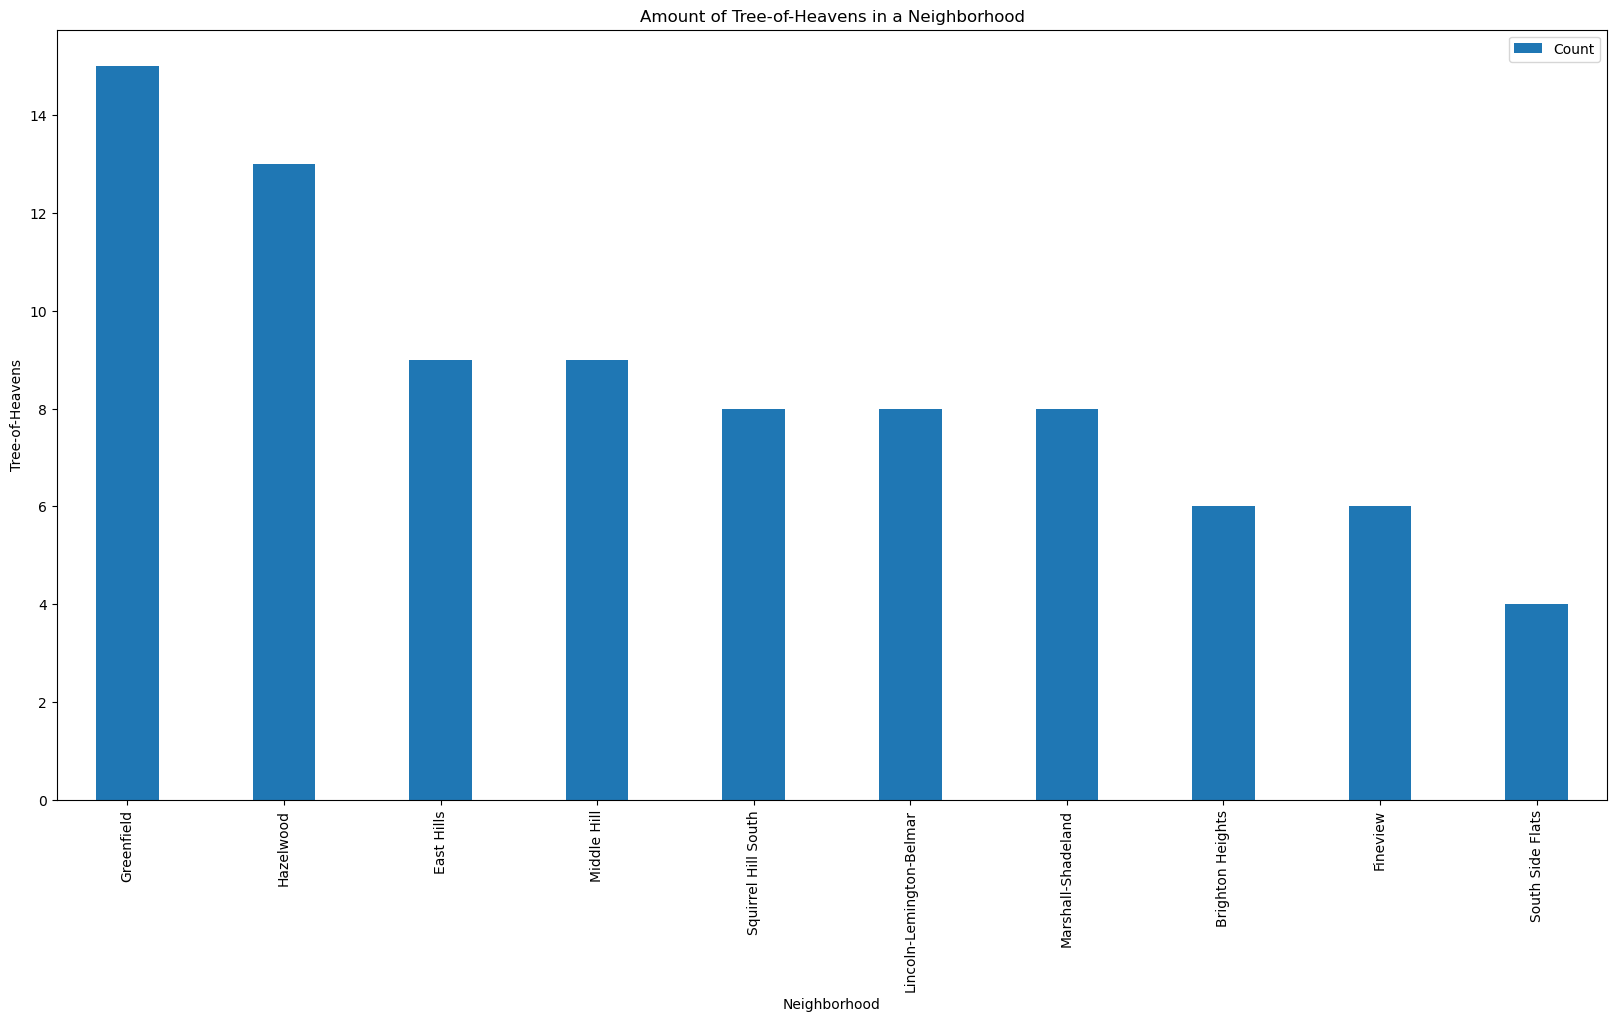

In [23]:
ind = trees[name_column].value_counts().reset_index()
ind.columns = ['Neighborhood', 'Count']

ind_10 = ind.head(10)

tr_plt = ind_10.plot(x = 'Neighborhood', y = 'Count', kind = 'bar', width = .4, figsize = (20, 10))
tr_plt.set_xlabel('Neighborhood')
tr_plt.set_ylabel('Tree-of-Heavens')
tr_plt.set_title('Amount of Tree-of-Heavens in a Neighborhood')
tr_plt.tight_layout()
tr_plt.show()